In [1]:
import numpy as np

# !pip install pillow

from PIL import Image
import glob
print("PIL 라이브러리 import 완료!")

# import os

PIL 라이브러리 import 완료!


In [8]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "./rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

이미지 디렉토리 경로:  ./rock_scissor_paper/scissor


In [9]:
# 파일마다 모두 28X28 사이즈로 바꾸어 저장
target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("가위 이미지 resize 완료!")

가위 이미지 resize 완료!


In [10]:
# 바위 이미지 28X28로 만들기
image_dir_path = "./rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료!")

# 보 이미지 28X28로 만들기
image_dir_path = "./rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

target_size = (28,28)
for img in images:
    old_img = Image.open(img)
    new_img = old_img.resize(target_size, Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  ./rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  ./rock_scissor_paper/paper
보 이미지 resize 완료!


In [27]:
# load_data() 함수로 가위, 바위, 보 데이터 읽기

# 1. 이미지 있는 폴더 위치 받기
# 2. 라벨링: 가위 - 0, 바위 - 1, 보 - 2

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data = 300    # 가위바위보 이미지 개수 총합
    img_size = 28
    color = 3               # 컬러 이미지란 뜻(R, G, B)
    
    # 이미지 데이터와 라벨 데이터를 담을 행렬 영역 생성
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0    # 가위 : 0
        idx = idx+1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1    # 바위 : 1
        idx = idx+1

    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2    # 보 : 2
        idx = idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [28]:
image_dir_path = "./rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0    # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


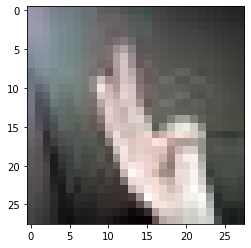

In [29]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  1


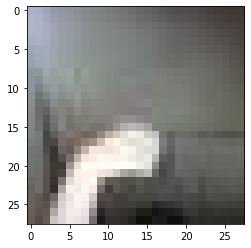

In [31]:
plt.imshow(x_train[100])
print('라벨: ', y_train[100])

라벨:  2


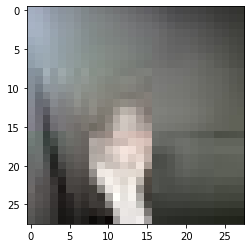

In [32]:
plt.imshow(x_train[200])
print('라벨: ', y_train[200])

In [33]:
## for문 활용해서 한번에 resize하는 방법

# image_directory = os.getenv("HOME")+"/SUBMIT_MISSION_GIT/ex1_RPC/ModelPic"
image_directory = "./rock_scissor_paper"
path_pool = "/rock","/scissor","/paper"
target_size = (28,28)
for path in path_pool:
    images = glob.glob(image_directory + path + "/*.jpg")
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
print("리사이징 완료")

리사이징 완료
